In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import numpy.linalg as npl
import numpy.random as npr


import scipy.linalg as la


from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import cvxpy as cp
from cvxpylayers.torch import CvxpyLayer

import matplotlib.pyplot as plt

import pandas as pd

from pathlib import Path  

import sys
import time
output_stream = sys.stdout

import gurobipy as gp
from gurobipy import GRB

import time
colors = ["tab:blue", "tab:orange", "tab:green",
          "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:grey", "tab:olive","tab:blue", "tab:orange", "tab:green",
          "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:grey", "tab:olive"] 

In [3]:
x_sols = np.load("x.npy") 
Opt_vals = np.load("Opt_vals.npy")
eval_vals = np.load("eval_vals.npy")
probs= np.load("probs.npy")
setuptimes = np.load("setuptimes.npy")
solvetimes = np.load("solvetimes.npy")

In [33]:
K_nums = np.array([1,5,50,100,500,800,900])
K_tot = K_nums.size  # Total number of clusters we consider
N_tot = 1000
M = 20
R = 10           # Total times we repeat experiment to estimate final probabilty
m = 200 
eps_min = -6    # minimum epsilon we consider
eps_max = -3.5        # maximum epsilon we consider
eps_nums = np.linspace(eps_min,eps_max,M)
eps_nums = 10**(eps_nums)
eps_tot = M

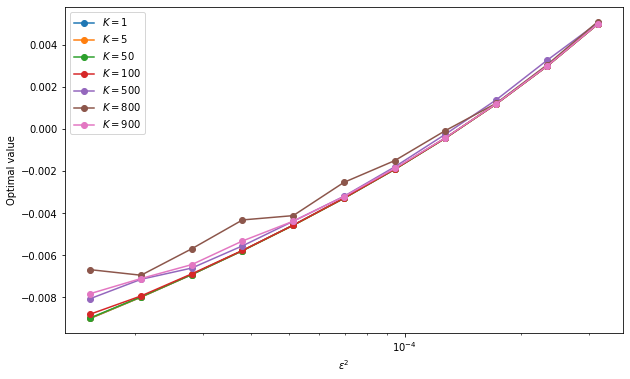

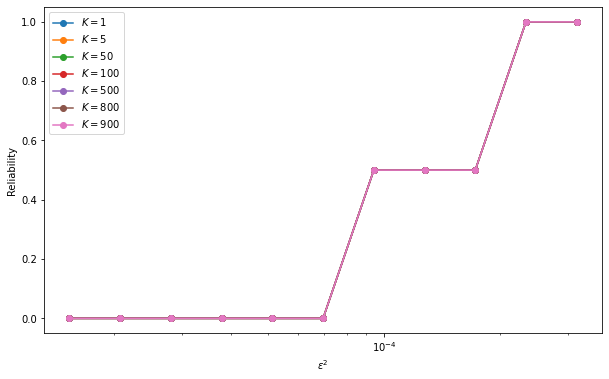

In [36]:
plt.figure(figsize=(10, 6))
for K_count, K in enumerate(K_nums):
    plt.plot(eps_nums[9:], np.mean(Opt_vals[:,9:,:2],axis = 2)[K_count,:],linestyle='-', marker='o', color = colors[K_count], label = "$K = {}$".format(round(K,4)))
    plt.xlabel("$\epsilon^2$")
plt.xscale("log")
plt.ylabel("Optimal value")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for K_count, K in enumerate(K_nums):
    plt.plot(eps_nums[9:], np.mean(probs[:,9:,:2],axis = 2)[K_count,:],linestyle='-', marker='o', color = colors[K_count], label = "$K = {}$".format(round(K,4)))
    plt.xlabel("$\epsilon^2$")
plt.xscale("log")
plt.ylabel("Reliability")
plt.legend()
plt.show()

In [10]:
np.shape(solvetimes[:,:,:2])

(7, 20, 2)

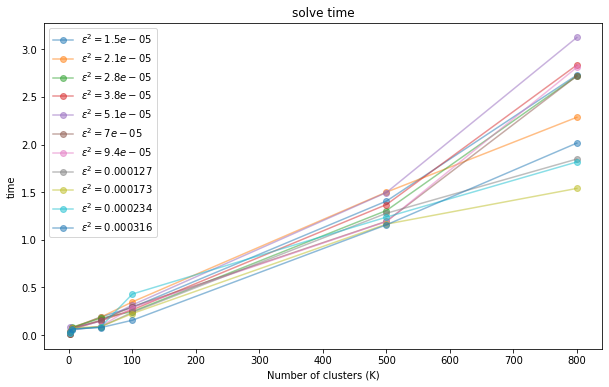

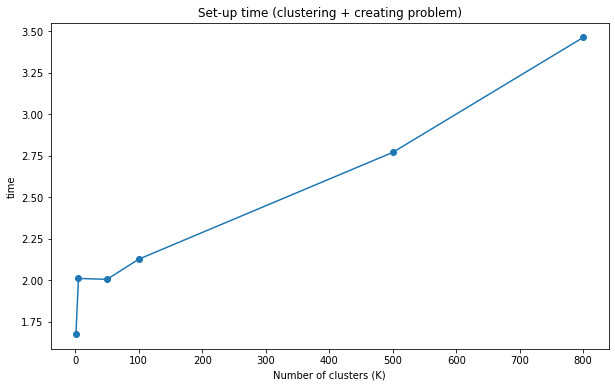

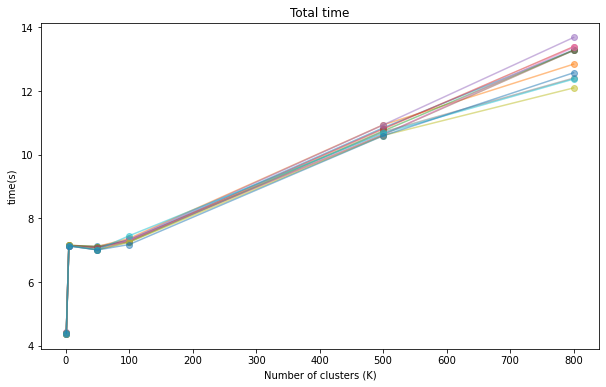

In [38]:
plt.figure(figsize=(10, 6))
for eps_count, eps in enumerate(eps_nums[9:]):
    eps_count += 9
    plt.plot(K_nums[:-1],np.mean(solvetimes[:-1,:,:2],axis = 2)[:,eps_count],linestyle='-', marker='o', label = "$\epsilon^2 = {}$".format(round(eps,6)), alpha = 0.5)
    plt.xlabel("Number of clusters (K)")

plt.ylabel("time")
plt.title("solve time")
#plt.yscale("log")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(K_nums[:-1],np.mean(setuptimes,axis = 1)[:-1],linestyle='-', marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("time")
plt.title("Set-up time (clustering + creating problem)")
plt.show()

plt.figure(figsize=(10, 6))
for eps_count, eps in enumerate(eps_nums[9:]):
    eps_count += 9
    plt.plot(K_nums[:-1],np.mean(setuptimes[:,:2],axis = 1)[:-1] + np.mean(solvetimes[:-1,:,:2],axis = 2)[:,eps_count],linestyle='-', marker='o', label = "$\epsilon^2 = {}$".format(round(eps,6)), alpha = 0.5)
    plt.xlabel("Number of clusters (K)")

plt.ylabel("time(s)")
plt.title("Total time")
#plt.yscale("log")
#plt.legend(fontsize=6)
plt.show()

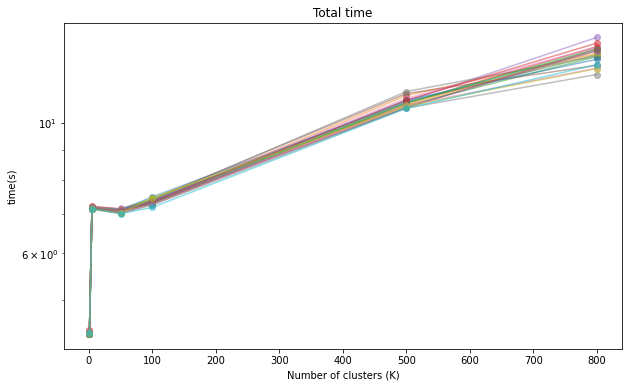

In [31]:
plt.figure(figsize=(10, 6))
for eps_count, eps in enumerate(eps_nums):
    plt.plot(K_nums[:-1],np.mean(setuptimes[:,:2],axis = 1)[:-1] + np.mean(solvetimes[:-1,:,:2],axis = 2)[:,eps_count],linestyle='-', marker='o', label = "$\epsilon^2 = {}$".format(round(eps,6)), alpha = 0.5)
    plt.xlabel("Number of clusters (K)")

plt.ylabel("time(s)")
plt.title("Total time")
plt.yscale("log")
#plt.legend(fontsize=6)
plt.show()